In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('triton_rezultati.csv')

df

,test,model,batch_size,floating_point,concurrency,kv_cache,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,...,p50 latency,p90 latency,p95 latency,p99 latency,request/response,response wait,Avg GPU Utilization,Avg GPU Power Usage,Max GPU Memory Usage,Total GPU Memory
0,alpha,gemma3,1,fp16,1:24:2,0,1,0.643508,50,719,...,1542649,1545638,1546397,1561484,50,1551326,GPU-0:0;GPU-1:0.595972;GPU-2:0;GPU-3:0;GPU-4:0...,GPU-0:192.228;GPU-1:302.562;GPU-2:192.052;GPU-...,GPU-0:47737470976;GPU-1:54514417664;GPU-2:4773...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...
1,alpha,gemma3,2,fp16,1:24:2,0,19,1.185160,54,819,...,32932954,32973698,32975293,34715581,54,30954911,GPU-0:0;GPU-1:0.624491;GPU-2:0;GPU-3:0;GPU-4:0...,GPU-0:192.18;GPU-1:303.353;GPU-2:192.636;GPU-3...,GPU-0:47737470976;GPU-1:54636052480;GPU-2:4773...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...
2,alpha,gemma3,2,fp16,1:24:2,0,11,1.203680,48,752,...,18114342,18157300,19758219,19796982,48,18116455,GPU-0:0;GPU-1:0.624352;GPU-2:0;GPU-3:0;GPU-4:0...,GPU-0:192.581;GPU-1:303.587;GPU-2:192.963;GPU-...,GPU-0:47737470976;GPU-1:54636052480;GPU-2:4773...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...
3,alpha,gemma3,2,fp16,1:24:2,0,5,1.203680,51,815,...,8238339,8254527,8257616,8259402,51,8238383,GPU-0:0;GPU-1:0.624352;GPU-2:0;GPU-3:0;GPU-4:0...,GPU-0:192.47;GPU-1:303.601;GPU-2:192.823;GPU-3...,GPU-0:47737470976;GPU-1:54636052480;GPU-2:4773...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...
4,alpha,gemma3,2,fp16,1:24:2,0,9,1.203680,54,820,...,14816465,16490745,16580923,18095577,54,14707821,GPU-0:0;GPU-1:0.619907;GPU-2:0;GPU-3:0;GPU-4:0...,GPU-0:192.592;GPU-1:302.573;GPU-2:192.876;GPU-...,GPU-0:47737470976;GPU-1:54636052480;GPU-2:4773...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,zeta,meta-llama,8,fp16,512:1024:64,8192,576,13.987400,281,922,...,329143845,330833337,331261255,331560238,281,323816420,GPU-0:0.703997;GPU-1:0.466343;GPU-2:0.69875;GP...,GPU-0:342.117;GPU-1:270.629;GPU-2:340.206;GPU-...,GPU-0:102086213632;GPU-1:115964116992;GPU-2:10...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...
252,zeta,meta-llama,8,fp16,512:1024:64,8192,960,13.999600,453,999,...,512343435,549324483,549671726,550244192,453,519014491,GPU-0:0.688488;GPU-1:0.465602;GPU-2:0.685509;G...,GPU-0:340.902;GPU-1:270.197;GPU-2:339.713;GPU-...,GPU-0:102086213632;GPU-1:115964116992;GPU-2:10...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...
253,zeta,meta-llama,8,fp16,512:1024:64,8192,896,13.999600,430,1008,...,476798372,512807724,513208252,513609853,430,485013772,GPU-0:0.709167;GPU-1:0.467253;GPU-2:0.698827;G...,GPU-0:341.349;GPU-1:270.188;GPU-2:340.182;GPU-...,GPU-0:102086213632;GPU-1:115964116992;GPU-2:10...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...
254,zeta,meta-llama,8,fp16,512:1024:64,8192,768,14.012000,374,942,...,404209525,438245955,438513709,439443760,374,415681413,GPU-0:0.701728;GPU-1:0.467269;GPU-2:0.700231;G...,GPU-0:342.508;GPU-1:271.086;GPU-2:341.1;GPU-3:...,GPU-0:102086213632;GPU-1:115964116992;GPU-2:10...,GPU-0:192265846784;GPU-1:192265846784;GPU-2:19...


In [32]:
for i in range(8):
    df[f'Avg_Utililisation {i}'] = df['Avg GPU Utilization'].str.extract(rf'GPU-{i}:(\d*\.?\d*)').astype(float)
    df[f'Avg_Power {i}'] = df['Avg GPU Power Usage'].str.extract(rf'GPU-{i}:(\d*\.?\d*)').astype(float)
    df[f'Max_Memory {i}'] = df['Max GPU Memory Usage'].str.extract(rf'GPU-{i}:(\d*\.?\d*)').astype(float)
    df[f'Total_Memory {i}'] = df['Total GPU Memory'].str.extract(rf'GPU-{i}:(\d*\.?\d*)').astype(float)
df.drop(columns=['Avg GPU Utilization'], inplace=True)
df.drop(columns=['Avg GPU Power Usage'], inplace=True)
df.drop(columns=['Max GPU Memory Usage'], inplace=True)
df.drop(columns=['Total GPU Memory'], inplace=True)

### concatenate test, batch_size, floating_point, kv_cache in one column
df['test'] = (df['test'].astype(str) + '_b' + df['batch_size'].astype(str) + '_' + df['floating_point'].astype(str) +
              '_kv' + df['kv_cache'].astype(str))
df.head()

,test,model,batch_size,floating_point,concurrency,kv_cache,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,...,Max_Memory 5,Total_Memory 5,Avg_Utililisation 6,Avg_Power 6,Max_Memory 6,Total_Memory 6,Avg_Utililisation 7,Avg_Power 7,Max_Memory 7,Total_Memory 7
0,alpha_b1_fp16_kv0,gemma3,1,fp16,1:24:2,0,1,0.643508,50,719,...,4.773747e+10,1.922658e+11,0.0,191.025,4.639529e+10,1.922658e+11,0.0,191.174,2.471913e+10,1.922658e+11
1,alpha_b2_fp16_kv0,gemma3,2,fp16,1:24:2,0,19,1.185160,54,819,...,4.773747e+10,1.922658e+11,0.0,191.088,4.639529e+10,1.922658e+11,0.0,191.302,2.471913e+10,1.922658e+11
2,alpha_b2_fp16_kv0,gemma3,2,fp16,1:24:2,0,11,1.203680,48,752,...,4.773747e+10,1.922658e+11,0.0,191.356,4.639529e+10,1.922658e+11,0.0,191.630,2.471913e+10,1.922658e+11
3,alpha_b2_fp16_kv0,gemma3,2,fp16,1:24:2,0,5,1.203680,51,815,...,4.773747e+10,1.922658e+11,0.0,191.255,4.639529e+10,1.922658e+11,0.0,191.453,2.471913e+10,1.922658e+11
4,alpha_b2_fp16_kv0,gemma3,2,fp16,1:24:2,0,9,1.203680,54,820,...,4.773747e+10,1.922658e+11,0.0,191.330,4.639529e+10,1.922658e+11,0.0,191.466,2.471913e+10,1.922658e+11


In [33]:
#Zadrži samo relevantne kolone
df_filtered = df[
    ['test', 'model', 'batch_size', 'floating_point', 'kv_cache',
     'Concurrency', 'Inferences/Second',
     'p50 latency', 'p90 latency', 'p95 latency', 'p99 latency', 'response wait'
     ]
].copy()

# convert latency columns to seconds from microseconds
df_filtered['p50 latency'] = round(df_filtered['p50 latency'] / 1000000, 3)
df_filtered['p90 latency'] = round(df_filtered['p90 latency'] / 1000000, 3)
df_filtered['p95 latency'] = round(df_filtered['p95 latency'] / 1000000, 3)
df_filtered['p99 latency'] = round(df_filtered['p99 latency'] / 1000000, 3)



In [34]:
df_filtered

,test,model,batch_size,floating_point,kv_cache,Concurrency,Inferences/Second,p50 latency,p90 latency,p95 latency,p99 latency,response wait
0,alpha_b1_fp16_kv0,gemma3,1,fp16,0,1,0.643508,1.543,1.546,1.546,1.561,1551326
1,alpha_b2_fp16_kv0,gemma3,2,fp16,0,19,1.185160,32.933,32.974,32.975,34.716,30954911
2,alpha_b2_fp16_kv0,gemma3,2,fp16,0,11,1.203680,18.114,18.157,19.758,19.797,18116455
3,alpha_b2_fp16_kv0,gemma3,2,fp16,0,5,1.203680,8.238,8.255,8.258,8.259,8238383
4,alpha_b2_fp16_kv0,gemma3,2,fp16,0,9,1.203680,14.816,16.491,16.581,18.096,14707821
...,...,...,...,...,...,...,...,...,...,...,...,...
251,zeta_b8_fp16_kv8192,meta-llama,8,fp16,8192,576,13.987400,329.144,330.833,331.261,331.560,323816420
252,zeta_b8_fp16_kv8192,meta-llama,8,fp16,8192,960,13.999600,512.343,549.324,549.672,550.244,519014491
253,zeta_b8_fp16_kv8192,meta-llama,8,fp16,8192,896,13.999600,476.798,512.808,513.208,513.610,485013772
254,zeta_b8_fp16_kv8192,meta-llama,8,fp16,8192,768,14.012000,404.210,438.246,438.514,439.444,415681413


In [35]:
# Add a combined metric
df_filtered['throughput_latency_ratio'] = df_filtered['Inferences/Second'] / df_filtered['p99 latency']
# For each test and model, get the row with the highest ratio
best_rows = df_filtered.loc[df_filtered.groupby(['test', 'model'])['throughput_latency_ratio'].idxmax()]

# order by highest throughput_latency_ratio
best_rows = best_rows.sort_values(by='throughput_latency_ratio', ascending=False)
# Display the best rows
best_rows.reset_index(drop=True, inplace=True)
best_rows.head(10)

# remove Concurrency column
best_rows.drop(columns=['Concurrency'], inplace=True)
# Display the best rows
best_rows.reset_index(drop=True, inplace=True)
best_rows.head(10)

,test,model,batch_size,floating_point,kv_cache,Inferences/Second,p50 latency,p90 latency,p95 latency,p99 latency,response wait,throughput_latency_ratio
0,beta_b8_bf16_kv0,mistral,8,bf16,0,13.64180,2.917,3.045,3.082,3.165,2926345,4.310205
1,gama_b8_bf16_kv128,gemma3,8,bf16,128,4.55551,1.747,1.750,1.751,1.753,1756092,2.598694
2,beta_b8_bf16_kv0,gemma3,8,bf16,0,4.49378,1.765,1.774,1.774,1.776,1775727,2.530282
3,delta_b8_bf16_kv256,gemma3,8,bf16,256,4.77773,1.671,1.674,1.675,2.197,1676417,2.174661
4,epsilon_b8_bf16_kv4096,gemma3,8,bf16,4096,4.71600,1.691,1.696,1.697,2.230,1695595,2.114798
5,gama_b8_bf16_kv128,mistral,8,bf16,128,14.39490,4.551,6.609,6.913,7.215,4989904,1.995135
6,beta_b8_bf16_kv0,meta-llama,8,bf16,0,9.02461,4.403,4.839,4.929,5.139,4424416,1.756102
7,alpha_b4_fp16_kv0,mistral,4,fp16,0,4.44434,2.690,2.782,2.817,2.843,2704351,1.563257
8,alpha_b4_fp16_kv0,gemma3,4,fp16,0,2.24069,1.780,1.784,1.787,1.791,2371328,1.251083
9,gama_b8_bf16_kv128,meta-llama,8,bf16,128,11.46900,5.831,8.414,8.868,9.172,6243350,1.250436


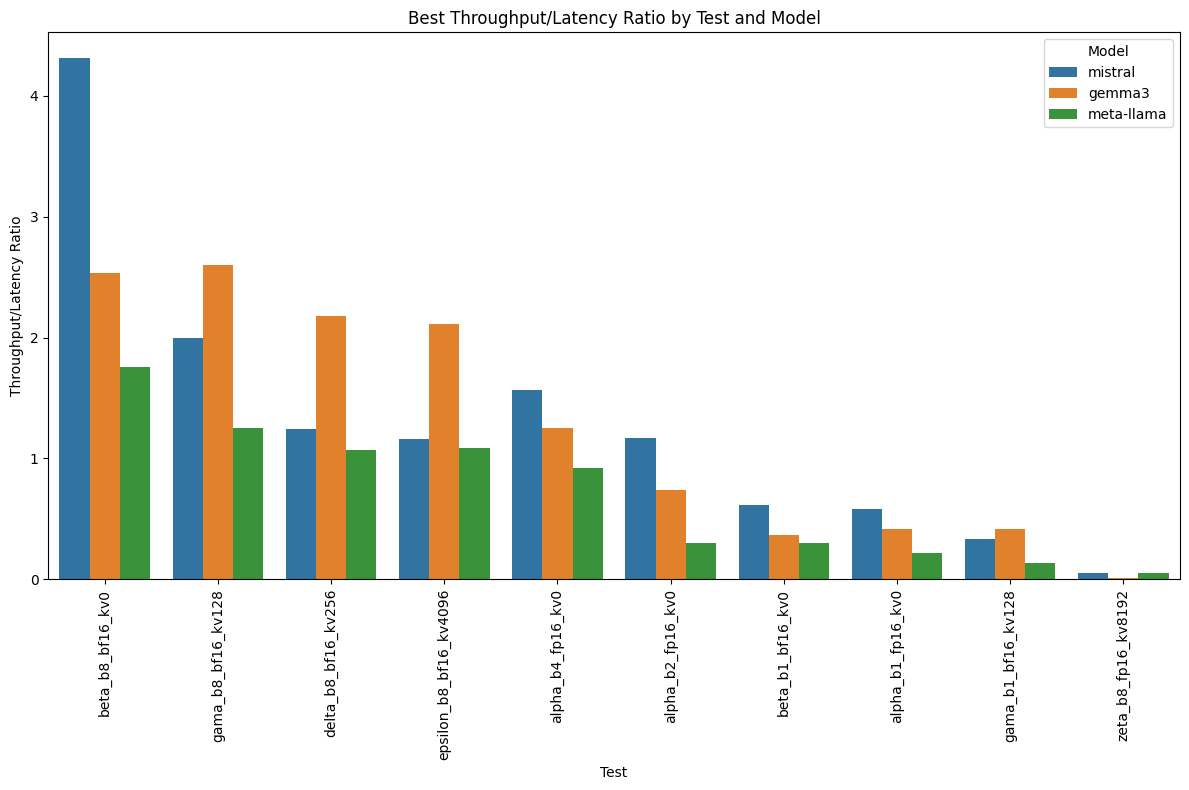

In [37]:
# plot the best rows
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))

sns.barplot(data=best_rows, x='test', y='throughput_latency_ratio', hue='model')
plt.title('Best Throughput/Latency Ratio by Test and Model')
plt.xlabel('Test')
plt.ylabel('Throughput/Latency Ratio')
plt.xticks(rotation=90)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


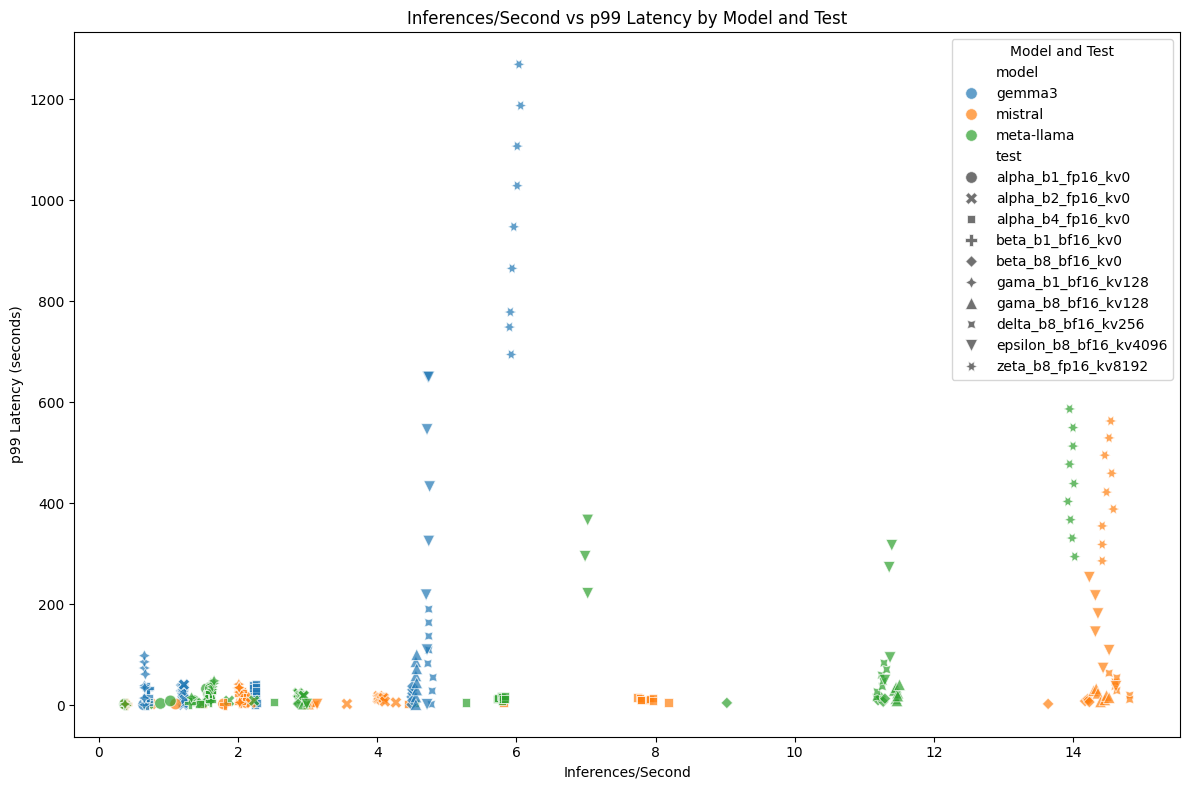

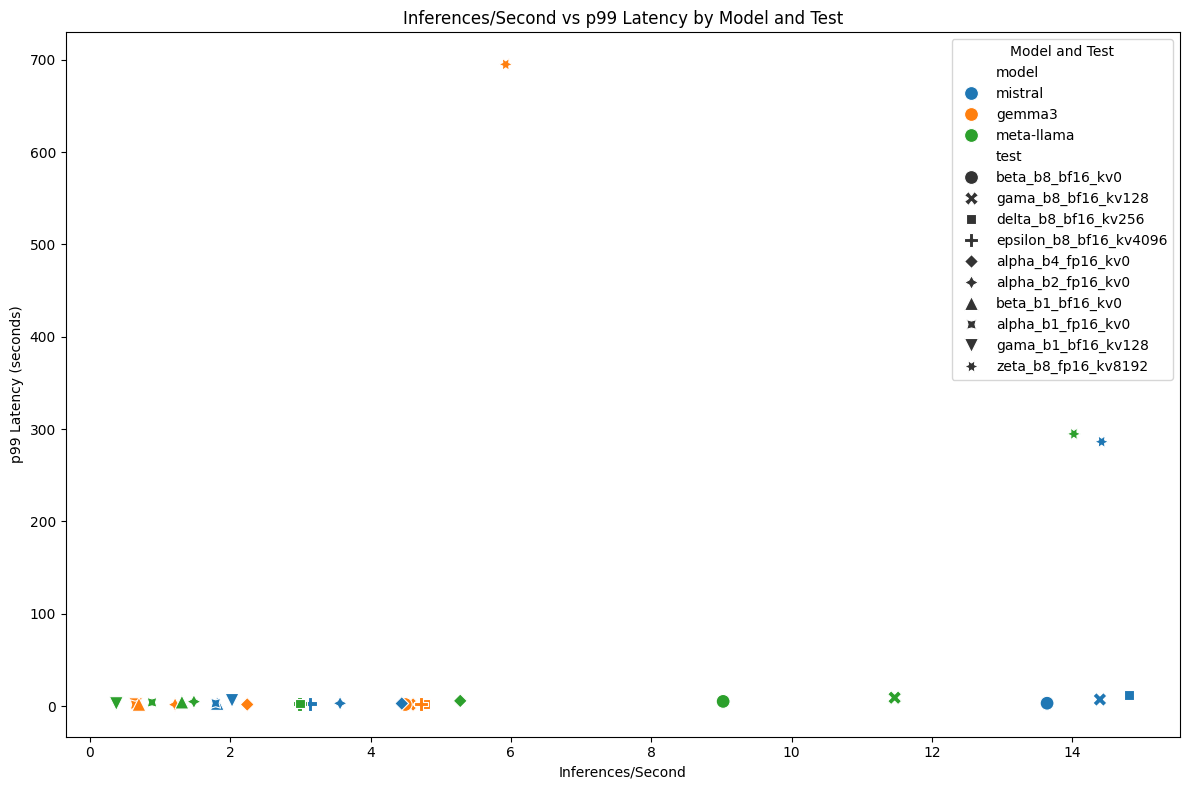

In [38]:
# scatter plot of Inferences/Second vs p99 latency
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='Inferences/Second', y='p99 latency', hue='model', style='test', s=70, alpha=0.7)
plt.title('Inferences/Second vs p99 Latency by Model and Test')
plt.xlabel('Inferences/Second')
plt.ylabel('p99 Latency (seconds)')
plt.legend(title='Model and Test')
plt.tight_layout()
plt.show()

# scatter plot of Inferences/Second vs p99 latency
plt.figure(figsize=(12, 8))
sns.scatterplot(data=best_rows, x='Inferences/Second', y='p99 latency', hue='model', style='test', s=100)
plt.title('Inferences/Second vs p99 Latency by Model and Test')
plt.xlabel('Inferences/Second')
plt.ylabel('p99 Latency (seconds)')
plt.legend(title='Model and Test')
plt.tight_layout()
plt.show()

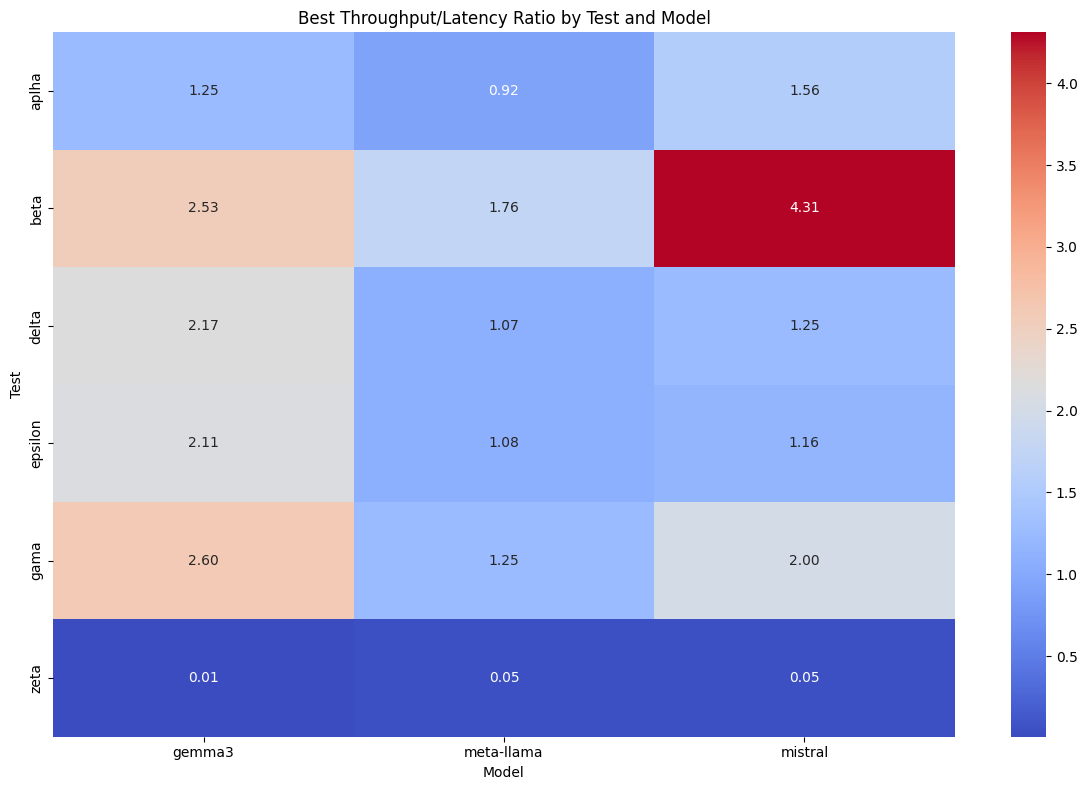

In [18]:
# crete a heatmap of the best rows
plt.figure(figsize=(12, 8))
sns.heatmap(best_rows.pivot_table(index='test', columns='model', values='throughput_latency_ratio'), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Best Throughput/Latency Ratio by Test and Model')
plt.xlabel('Model')
plt.ylabel('Test')
plt.tight_layout()
plt.show()
